In [3]:
class Empty(Exception):
    pass
class LinkedStack:
    """Copied from script"""
    #--- -Node class- ---
    class _Node:
        __slots__ = '_element', '_next' #faster memory access
        
        def __init__(self,element,next):
            self._element = element
            self._next = next
            
    #--- -Stack methods- ---
    def __init__(self): #empty stack
        self._head = None
        self._size = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def push(self,e):
        self._head = self._Node(e,self._head)
        self._size += 1
        
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        return self._head._element
    
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        return answer

In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def make_plot(n, times, plot_function, title):
    x1 = np.linspace(0, n)
    s_times = times * x1
    x2 = np.arange(200,99999)
    popt, pcov = curve_fit(plot_function, x1, s_times)
    print("a = %s , b = %s" % (popt[0], popt[1]))
    plt.subplot(2, 1, 1)
    plt.plot(x1, s_times, 'm.')
    plt.plot(x2, plot_function(x2, *popt), label="hypothesis")
    plt.title(title)
    plt.xlabel("number of elements")
    plt.ylabel("time")
    plt.grid()
    plt.tight_layout()
    plt.show()

def lin_func(x, a, b):
    return a*x + b


def pop_time(n):
    s = LinkedStack()
    for i in range(0, n):
        s.push(i)
    start1 = time.time()
    for _ in range(0, n):
        s.pop()
    end1 = time.time() - start1
    return end1

def pop_analysis(n):
    make_plot(n,pop_time(n),lin_func,'pop')

def push_time(n):
    s = LinkedStack()
    start1 = time.time()
    for i in range(0, n):
        s.push(i)
    end1 = time.time() - start1
    return end1

def push_analysis(n):
    make_plot(n,push_time(n),lin_func,'push')



def len_time(n):
    s = LinkedStack()
    start1 = time.time()
    i=0
    while i<n:
        s.push(i)
        l= len(s)
        i+=1
    end1 = time.time() - start1
    return end1

def len_analysis(n):
    make_plot(n,len_time(n),lin_func,'len')

def is_empty_time(n):
    s = LinkedStack()
    for i in range(0, n):
        s.push(i)
    start1 = time.time()
    for _ in range(0, n):
        s.is_empty()
    end1 = time.time() - start1
    return end1

def is_empty_analysis(n):
    make_plot(n,is_empty_time(n),lin_func,'is_empty')



def top_time(n):
    s = LinkedStack()
    for i in range(0, n):
        s.push(i)
    start1 = time.time()
    for _ in range(0, n):
        s.top()
    end1 = time.time() - start1
    return end1

def top_analysis(n):
    make_plot(n,top_time(n),lin_func,'top')



a = 0.03601026533111472 , b = 4.042841582369613e-07


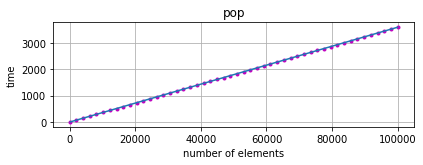

In [5]:
pop_analysis(100000)

a = 0.09901452049809178 , b = 8.626867525750611e-06


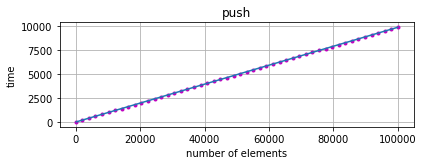

In [6]:
push_analysis(100000)

a = 0.008000850673426516 , b = 2.571856927973878e-07


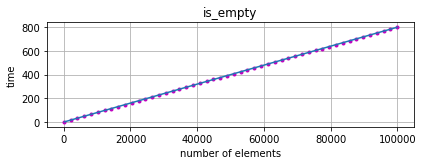

In [7]:
is_empty_analysis(100000)

a = 0.016003608702936573 , b = 1.3592438951496734e-16


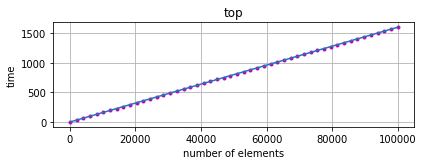

In [8]:
top_analysis(100000)

a = 0.11003088898334372 , b = 3.51877993434788e-05


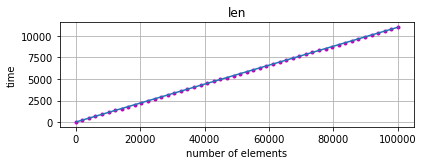

In [9]:
len_analysis(100000)